In [1]:
import pandas as pd, numpy as np , seaborn as sns, matplotlib.pyplot as plt
import os
from matplotlib import font_manager as fm, rcParams
from matplotlib.ticker import ScalarFormatter, FuncFormatter, MultipleLocator
import scipy.stats as stats
from funcs import *
%matplotlib inline

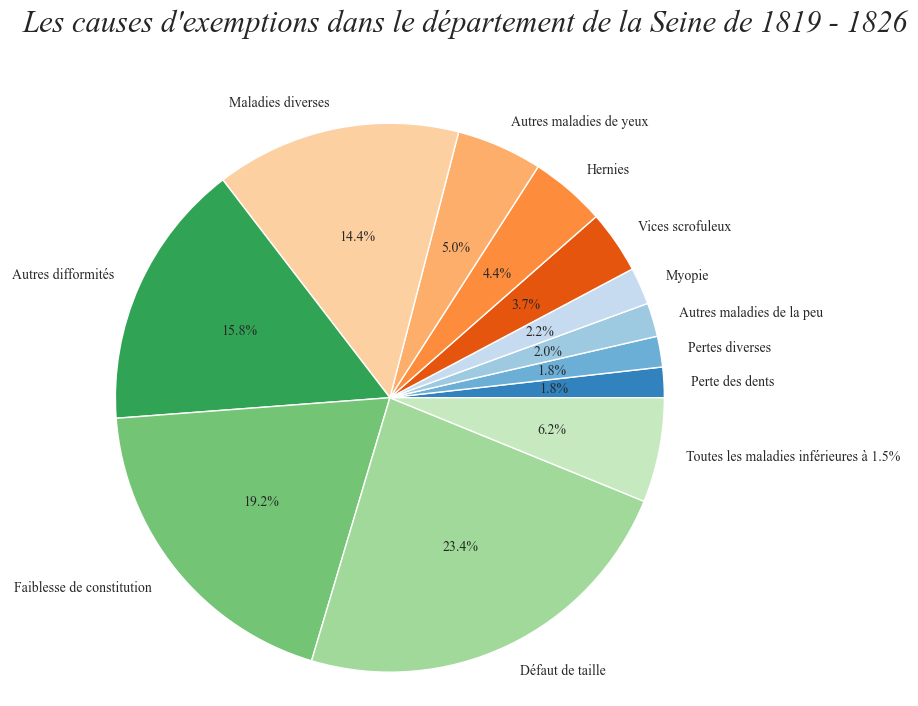

In [2]:
m1819 = pd.read_csv("data/secondary/maladies_ladurie.csv", sep=',')

seine_row = m1819[m1819['Departement'] == 'Seine']

seine_row = seine_row.drop(columns=['Departement', 'Total des exemptés pour maladie', 'Lacunes'])

# Melt the DataFrame to reshape it for plotting with Seaborn
seine_row_melted = seine_row.melt(var_name='Disease', value_name='Count')

seine_row_melted['Count'] = seine_row_melted['Count'].astype(int)
seine_row_melted = seine_row_melted.sort_values("Count")

# Calculate the percentage for each disease
total_count = seine_row_melted['Count'].sum()
seine_row_melted['Percentage'] = seine_row_melted['Count'] / total_count * 100

# Group diseases with values under 2.1% into a new category
threshold = 1.5
low_percent_diseases = seine_row_melted[seine_row_melted['Percentage'] < threshold]
total_low_percent_count = low_percent_diseases['Count'].sum()
total_low_percent_percentage = low_percent_diseases['Percentage'].sum()
new_category = pd.DataFrame({'Disease': ['Toutes les maladies inférieures à 1.5%'],
                             'Count': [total_low_percent_count],
                             'Percentage': [total_low_percent_percentage]})

# Concatenate the new category with the original DataFrame
seine_row_melted_with_category = pd.concat([seine_row_melted[seine_row_melted['Percentage'] >= threshold], new_category])

# Plot the pie chart using Seaborn
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
colors = sns.color_palette('tab20c')
plt.rcParams["font.family"] = "Times New Roman"
plt.pie(seine_row_melted_with_category['Count'], colors = colors, labels=seine_row_melted_with_category['Disease'], autopct='%1.1f%%')
plt.title("Les causes d'exemptions dans le département de la Seine de 1819 - 1826", style='italic', fontsize=22, x=0.6, y=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout(pad=4.0)
plt.savefig('data/secondary/maladies_ladurie.png', dpi=300)
plt.show()

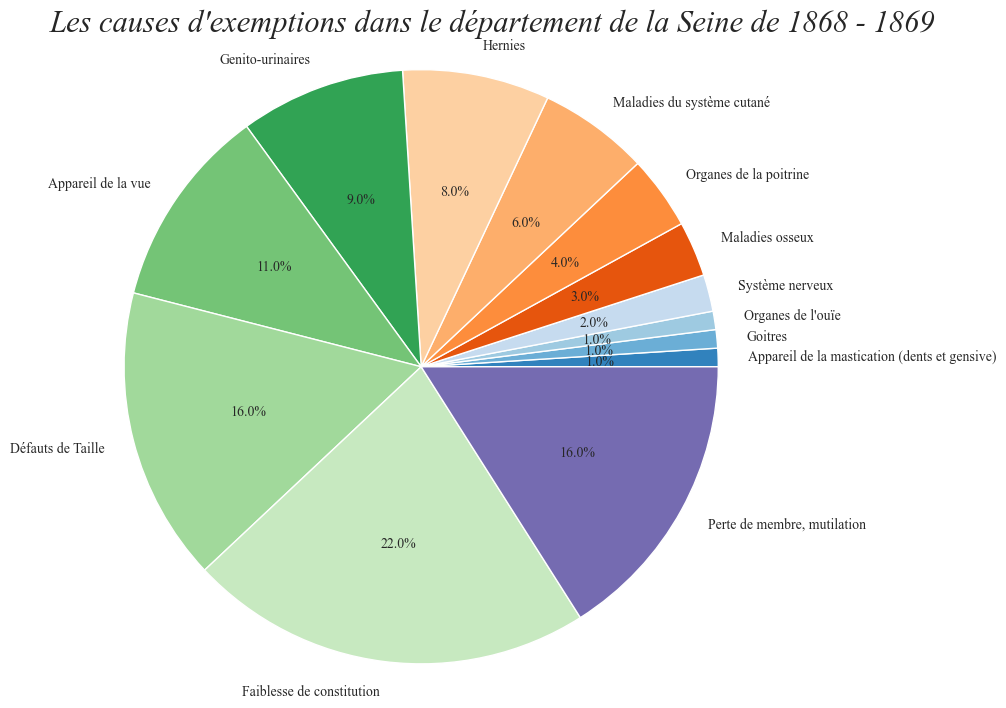

In [3]:
m1868 = pd.read_csv("data/secondary/maladies_soudjian.csv", sep=',')
m1868 = m1868.drop(columns=['Page 199'])
m1868 = m1868.drop(index=[16,14,13,12])
m1868 = m1868.sort_values("Pourcentage")
new_index = list(m1868.index[:-2]) + [m1868.index[-1], m1868.index[-2]]
m1868 = m1868.reindex(new_index)
# Plot the pie chart using Seaborn
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
colors = sns.color_palette('tab20c')
plt.rcParams["font.family"] = "Times New Roman"
plt.pie(m1868['Pourcentage'], colors = colors, labels=m1868["Motifs d'exemptios pour la classe 1868"], autopct='%1.1f%%')
plt.title("Les causes d'exemptions dans le département de la Seine de 1868 - 1869", style='italic', fontsize=22, x=0.6)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout(pad=4.0)
plt.savefig('data/secondary/maladies_soudjian.png', dpi=300)
plt.show()

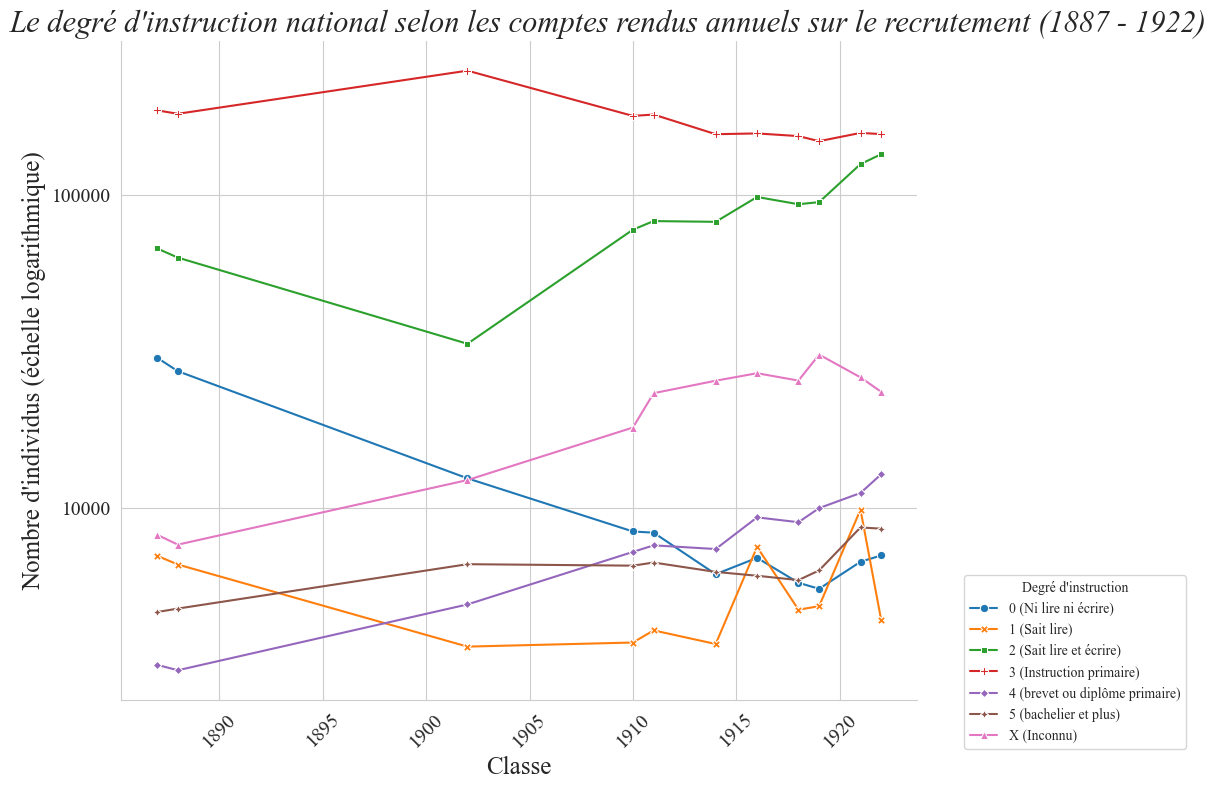

In [4]:
inst1914 = pd.read_csv("data/secondary/instruction_CRA.csv", sep=',')
inst1914 = inst1914.drop(columns=['Total des examinés'])
inst1914.set_index('Classe', inplace=True)

# Plot the education levels on a logarithmic scale using Seaborn
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
sns.lineplot(data=inst1914, markers=True, dashes=False)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.xlabel('Classe', fontsize=18)
plt.ylabel("Nombre d'individus (échelle logarithmique)", fontsize=18)
plt.title("Le degré d'instruction national selon les comptes rendus annuels sur le recrutement (1887 - 1922)", style='italic', fontsize=22, x=0.612)
plt.legend(title="Degré d'instruction", bbox_to_anchor=(1.05, 0.2), loc='upper left')
plt.xticks(rotation=45, fontsize=14)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Disable scientific notation
plt.yticks(fontsize=14)
plt.tight_layout()
sns.despine()
plt.savefig('data/secondary/instruction_CRA.png', dpi=300)
plt.show()

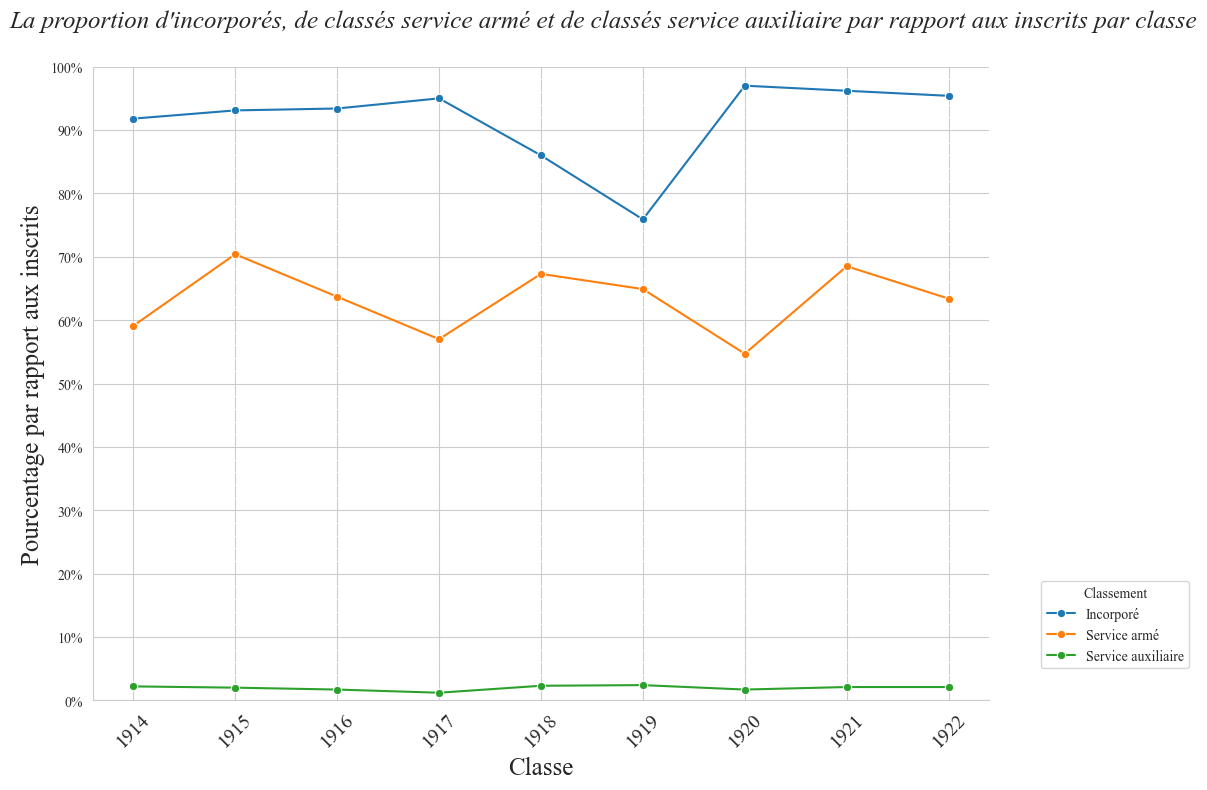

In [5]:
class1914 = pd.read_csv("data/secondary/classement_boulanger.csv", sep=',')
class1914['Classe'] = pd.to_numeric(class1914['Classe'])
percentage_cols = ['Incorporé ', 'Service armé par rapport aux inscrits', 'Service auxiliaire par rapport aux inscrits']
class1914[percentage_cols] = class1914[percentage_cols].apply(lambda x: x.str.rstrip('%').astype(float) / 100)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
sns.lineplot(data=class1914, x='Classe', y='Incorporé ', marker='o', label='Incorporé')
sns.lineplot(data=class1914, x='Classe', y='Service armé par rapport aux inscrits', marker='o', label='Service armé')
sns.lineplot(data=class1914, x='Classe', y='Service auxiliaire par rapport aux inscrits', marker='o', label='Service auxiliaire')
plt.xlabel('Classe', fontsize=18)
plt.ylabel("Pourcentage par rapport aux inscrits", fontsize=18)
plt.title("La proportion d'incorporés, de classés service armé et de classés service auxiliaire par rapport aux inscrits par classe", style='italic', fontsize=18, x=0.57, y=1.05)
plt.legend(title='Service Type', loc='upper right')
plt.legend(title="Classement", bbox_to_anchor=(1.05, 0.2), loc='upper left')
plt.xticks(rotation=45, fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))  # Format y-axis ticks as percentages
plt.ylim(0, 1)
plt.yticks(ticks=[i/10 for i in range(11)])  # Set y-axis ticks every 10%
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.02))  # Add minor ticks every 2%
plt.grid(axis='y', which='minor', linestyle='--', color='white')  # Add white grid lines every two percent along the y-axis
sns.despine()
plt.tight_layout()
plt.savefig('data/secondary/classement_boulanger.png', dpi=300)
plt.show()

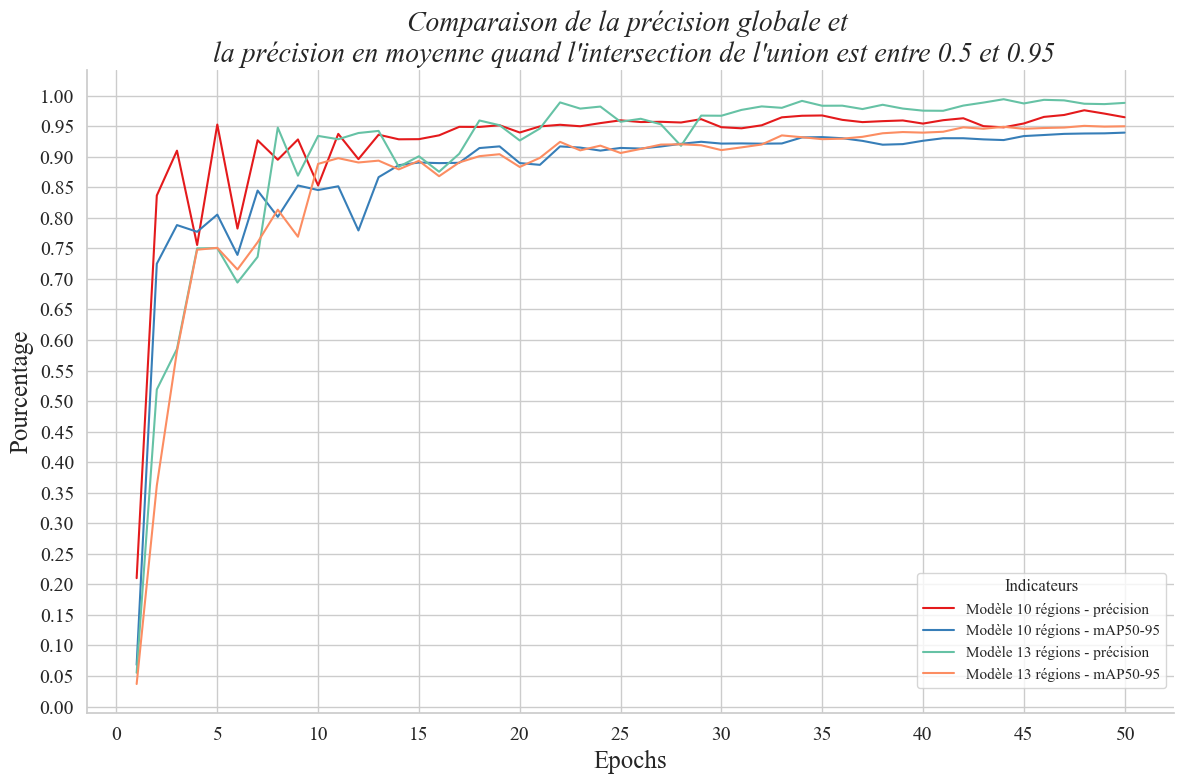

In [6]:
df1 = pd.read_csv("data/model_data/model10_results.csv", sep = ',')
df2 = pd.read_csv("data/model_data/model13_results.csv", sep = ',')
# Set up a custom color palette for each model
palette_model1 = sns.color_palette("Set1", n_colors=2)  # Change the number of colors as needed
palette_model2 = sns.color_palette("Set2", n_colors=2)  # Change the number of colors as needed

# Set up the Seaborn style with the custom palettes
sns.set_theme(style="whitegrid", palette=[palette_model1[0], palette_model1[1], palette_model2[0], palette_model2[1]])
plt.rcParams["font.family"] = "Times New Roman"

# Create a line plot for both precision and recall on the same axes
plt.figure(figsize=(12, 8))
# Precision plot for model 1
precision_plot_m1 = sns.lineplot(x='                  epoch', y='   metrics/precision(B)', data=df1, markers=True, label='Modèle 10 régions - précision')
# Recall plot for model 1
mAP_plot_m1 = sns.lineplot(x='                  epoch', y='    metrics/mAP50-95(B)', data=df1, markers=True, label='Modèle 10 régions - mAP50-95')

# Precision plot for model 2
precision_plot_m2 = sns.lineplot(x='                  epoch', y='   metrics/precision(B)', data=df2, markers=True, label='Modèle 13 régions - précision')
# Recall plot for model 2
mAP_plot_m2 = sns.lineplot(x='                  epoch', y='    metrics/mAP50-95(B)', data=df2, markers=True, label='Modèle 13 régions - mAP50-95')

# Set labels and title
plt.title("Comparaison de la précision globale et \n la précision en moyenne quand l'intersection de l'union est entre 0.5 et 0.95", style='italic', fontsize=20, x=0.5)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Pourcentage',fontsize=18)

# Add more ticks to the axes
plt.xticks(range(0, 51, 5), fontsize=14) # Assuming you have 50 epochs
plt.yticks([i/20 for i in range(21)], fontsize=14)# Adjust the range based on your data

# Show the legend with a custom location and title
plt.legend(title='Indicateurs',bbox_to_anchor=(1, 0.23), loc='upper right')

# Show the plot
sns.despine()
plt.savefig('data/secondary/precision_mAP_comparison.png', dpi=300)
plt.tight_layout()
plt.show()


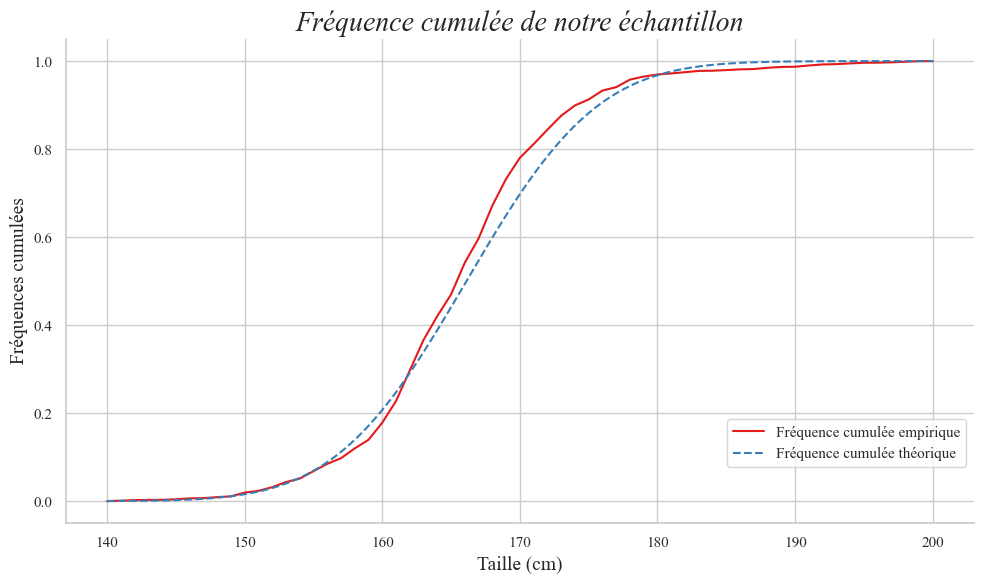

In [7]:
df = pd.read_csv('data/primary/big_bertha.csv', sep=',')
unlist_all_rows(df)
extract_height(df)
# Calculate normalized frequencies
height_counts = df['taille (cm)'].value_counts().sort_index()
height_freq = height_counts / height_counts.sum()

# Calculate cumulative distribution of heights
height_cdf = height_freq.cumsum()

# Fit normal distribution to the height data
mean_height = df['taille (cm)'].mean()
std_dev_height = df['taille (cm)'].std()
normal_dist = stats.norm(loc=mean_height, scale=std_dev_height)

# Calculate cumulative distribution function (CDF) of the normal distribution
x = np.linspace(df['taille (cm)'].min(), df['taille (cm)'].max(), 1000)
normal_cdf = normal_dist.cdf(x)


# Plot the cumulative distributions
plt.figure(figsize=(10, 6))
plt.plot(height_cdf.index, height_cdf, label='Fréquence cumulée empirique')
sns.despine()
plt.plot(x, normal_cdf, label='Fréquence cumulée théorique', linestyle='--')
plt.title('Fréquence cumulée de notre échantillon', style='italic', fontsize=20)
plt.xlabel('Taille (cm)', fontsize=14)
plt.ylabel('Fréquences cumulées', fontsize=14)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 0.23), loc='upper right')
plt.savefig('data/secondary/freq.png', dpi=300)
plt.tight_layout()
plt.show()